# Import and Load

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from keras.datasets import fashion_mnist

In [3]:
mnist=tf.keras.datasets.fashion_mnist

# loading Mnist dataset

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

# Testing shape

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
x_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

# Plot

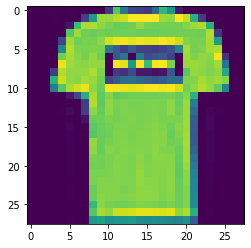

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [9]:
y_train[1]

0

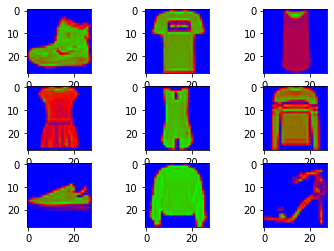

In [10]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('brg'))
 
plt.show()

# Scaling

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

# Reshaping

In [13]:
x_train=x_train.reshape((60000,784))
x_test=x_test.reshape((10000,784))

In [14]:
x_train[1].shape

(784,)

# Converting Into Categoriacal Using One hot Encoding

In [15]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [16]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import InputLayer, Dense 
model = Sequential()

In [18]:
model.add(InputLayer(input_shape=(784,)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


# Compile

In [19]:
model.compile(optimizer='sgd',loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit

In [20]:
model.fit(x_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.5985 - accuracy: 0.7888
Epoch 2/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.4169 - accuracy: 0.8485
Epoch 3/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3732 - accuracy: 0.8638
Epoch 4/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.3482 - accuracy: 0.8719
Epoch 5/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3287 - accuracy: 0.8803
Epoch 6/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3137 - accuracy: 0.8840
Epoch 7/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.3008 - accuracy: 0.8897
Epoch 8/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2888 - accuracy: 0.8929
Epoch 9/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2790 - accuracy: 0.8959
Epoch 10/10
6000/6000 [==============================] - 7s 1ms/step - loss: 0.271

In [21]:
loss,accuracy=model.evaluate(x_test,y_test,batch_size=128)

79/79 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8558


In [22]:
y_predict = model.predict(x_test)
y_predict

array([[7.1620193e-06, 3.5137114e-06, 1.6927603e-06, ..., 4.4110524e-03,
        4.1042698e-05, 9.9215853e-01],
       [3.3595868e-06, 1.5724277e-08, 9.9914920e-01, ..., 1.0523669e-08,
        3.6869894e-09, 1.5205343e-10],
       [7.9125959e-09, 1.0000000e+00, 3.7747082e-08, ..., 5.1191633e-09,
        6.0566170e-11, 1.3068881e-11],
       ...,
       [6.3666482e-03, 3.0843419e-06, 1.2652249e-03, ..., 3.9218262e-06,
        9.8989713e-01, 1.2931940e-07],
       [5.9123835e-07, 9.9991870e-01, 4.9840733e-06, ..., 1.0090126e-05,
        9.0230792e-08, 2.1416328e-08],
       [1.1359854e-06, 3.1411093e-06, 1.9070152e-06, ..., 2.5446629e-04,
        9.9395402e-05, 3.7215182e-06]], dtype=float32)

# Categories of images

In [23]:
l = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]  

In [24]:
x = np.argmax(y_predict[3])
x

1

In [25]:
l[x]

'Trouser'